In [1]:
import os
from pathlib import Path

base = Path("/home/staniewi/dev/sweets-testing/demo")
base.mkdir(exist_ok=True)
os.chdir(base)

## Environment setup:

```bash
mamba create -n sweets-env sweets
conda activate sweets-env
```

## Command line interface

In [2]:
!sweets --help

usage: sweets [-h] {config,run} ...

positional arguments:
  {config,run}
    config      Create a sweets_config.yaml file
    run         Run the workflow using a sweets_config.yaml file

options:
  -h, --help    show this help message and exit


In [3]:
!sweets config --help

usage: sweets config [-h] [--save-empty] [-o OUTFILE]
                     [-b left bottom right top] [--wkt WKT]
                     [--track RELATIVEORBIT] [--start START] [--end END]
                     [--frames start_frame end_frame] [--data-dir DATA_DIR]
                     [--looks az_looks range_looks] [-t MAX_TEMPORAL_BASELINE]
                     [--max-bandwidth MAX_BANDWIDTH] [--orbit-dir ORBIT_DIR]
                     [-nw N_WORKERS] [-tpw THREADS_PER_WORKER]

  --save-empty          Print an empty config file to `outfile (default:
                        False)
  -o OUTFILE, --outfile OUTFILE
                        Path to save the config file to. If not specified,
                        will save to `sweets_config.yaml` in the current
                        directory. (default: sweets_config.yaml)
  -b left bottom right top, --bbox left bottom right top
                        Bounding box of area of interest in decimal degrees
                        longitude/l

## Workflow demo: one interferogram of Texas earthquake

The relative orbit/bounding box was found using ASF Vertex. We pass this to the `sweets config` tool:

In [6]:
!sweets config  --bbox -102.2 32.15 -102.1 32.22 --start 2022-12-15 --end 2022-12-29 --track 78

Creating config file at sweets_config.yaml.


Alternatively, you can do the configuration in python:

In [15]:
from sweets.core import Workflow

bbox = (-102.2, 32.15, -102.1, 32.22)
start = "2022-12-15"  # can be strings or datetime objects
end = "2022-12-29"
track = 78
w = Workflow(bbox=bbox, asf_query=dict(start=start, end=end, relativeOrbit=track))

# To save as a yaml file:
# w.to_yaml("sweets_config.yaml")

# To directly run:
# w.run()

In [7]:
!ls
!head sweets_config.yaml

sweets_config.yaml
# Root of working directory for processing.
#   Type: string.
work_dir: /u/aurora-r0/staniewi/dev/sweets-testing/demo
# Area of interest: (left, bottom, right, top) longitude/latitude e.g.
#   `bbox=(-150.2,65.0,-150.1,65.5)`.
#   Type: array.
bbox:
  - -102.2
  - 32.15
  - -102.1


In [8]:
!sweets run sweets_config.yaml

[08/25/23 10:38:40] INFO     Setting up 4 workers for                ]8;id=717587;file:///u/aurora-r0/staniewi/repos/sweets/src/sweets/core.py\core.py]8;;\:]8;id=271811;file:///u/aurora-r0/staniewi/repos/sweets/src/sweets/core.py#538\538]8;;\
                             ThreadPoolExecutor                                 
[08/25 10:38:40] [INFO dem.py] Bounds: -102.45 31.9 -101.85 32.47
[08/25 10:38:40] [INFO dem.py] Bounds: -102.45 31.9 -101.85 32.47
[08/25/23 10:38:40] INFO     Using cached burst DB at            ]8;id=632322;file:///u/aurora-r0/staniewi/repos/sweets/src/sweets/_burst_db.py\_burst_db.py]8;;\:]8;id=825478;file:///u/aurora-r0/staniewi/repos/sweets/src/sweets/_burst_db.py#44\44]8;;\
                             /home/staniewi/.cache/sweets/burst_                
                             map_bbox_only.sqlite3                              
[08/25 10:38:40] [INFO cop_dem.py] Creating /u/aurora-r0/staniewi/dev/sweets-testing/demo/dem.tif
[08/25 10:38:40]

## Plotting

With extra plotting dependencies, you can interactively browse the results:

```
mamba install matplotlib ipywidgets
```

(Note that the interactive part is useful for many interferograms, but here we only made one)

Browsing 1 ifgs.
Found 1 .unw.tif files


interactive(children=(IntSlider(value=0, description='idx', max=0), Output()), _dom_classes=('widget-interact'…

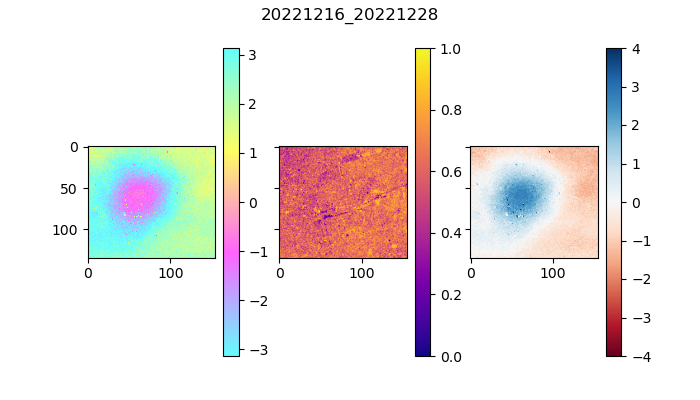

In [10]:
%matplotlib widget
from sweets.plotting import browse_ifgs

browse_ifgs(base, vm_unw=4)